In [9]:
from GOAT_functions import *
import pandas as pd

players, teams, finals = load_csvs(
    "NBA_PLAYERS.csv",
    "NBA_TEAMS.csv",
    "NBA Finals and MVP.csv"
)
GOATS_IDS = {
    "Michael Jordan": 893,
    "Kobe Bryant": 977,
    "LeBron James": 2544
}

championships_df = pd.DataFrame({
    "PLAYER_NAME": ["Michael Jordan", "Kobe Bryant", "LeBron James"],
    "CHAMPIONSHIPS": [6, 5, 4]
})

career_df = build_career_df(GOATS_IDS)


career_df = add_per_minute_stats(career_df, ["PTS", "REB", "AST", "STL", "BLK"])
career_df = add_per_36_stats(career_df, ["PTS", "REB", "AST", "STL", "BLK"])

metrics = prepare_metrics_df(career_df)

cols_to_scale = [
    "PTS_PER_36",
    "REB_PER_36",
    "AST_PER_36",
    "STL_PER_36",
    "BLK_PER_36",
    "FG_PCT",
    "FG3_PCT",
    "FT_PCT"
]
metrics = scale_metrics(metrics, cols_to_scale)


weights = {
    "PTS_PER_36": 0.25,
    "REB_PER_36": 0.15,
    "AST_PER_36": 0.15,
    "STL_PER_36": 0.05,
    "BLK_PER_36": 0.05,
    "FG_PCT": 0.15,
    "FG3_PCT": 0.10,
    "FT_PCT": 0.10}

metrics = compute_goat_index(metrics, weights)
metrics = add_championships(metrics, championships_df)
metrics = compute_final_index(metrics)


ranking = career_ranking(metrics)
ranking = ranking.reset_index(drop=True)
ranking.index += 1
ranking.index.name = "RANK"
ranking

ranking.to_csv(
    "goat_ranking_final.csv",
    index=False
)


ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

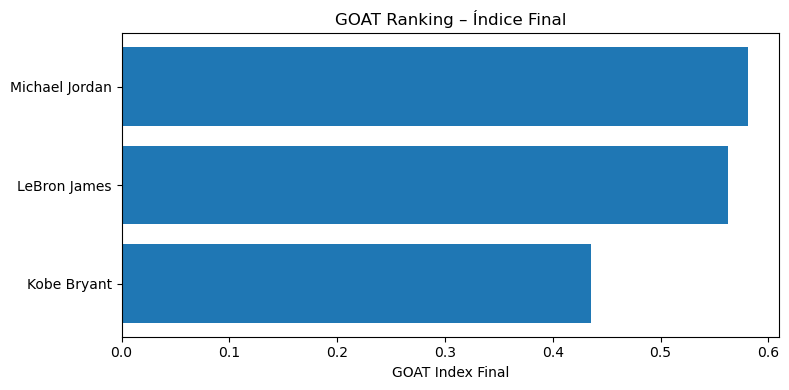

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

plt.barh(
    ranking["PLAYER_NAME"],
    ranking["GOAT_INDEX_FINAL"]
)

plt.xlabel("GOAT Index Final")
plt.title("GOAT Ranking – Índice Final")

# Para que el #1 quede arriba
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


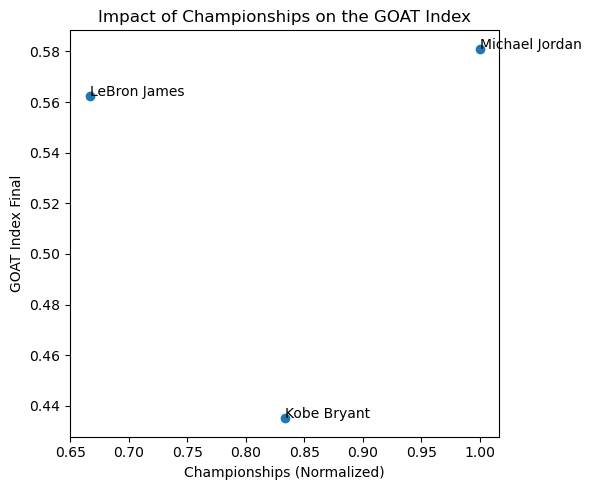

In [ ]:


plt.figure(figsize=(6, 5))

plt.scatter(
    ranking["CHAMPIONSHIPS_NORM"],
    ranking["GOAT_INDEX_FINAL"]
)

# Etiquetas con el nombre del jugador
for i in range(len(ranking)):
    plt.text(
        ranking["CHAMPIONSHIPS_NORM"].iloc[i],
        ranking["GOAT_INDEX_FINAL"].iloc[i],
        ranking["PLAYER_NAME"].iloc[i]
    )

plt.xlabel("Championships (Normalized)")
plt.ylabel("GOAT Index Final")
plt.title("Impact of Championships on the GOAT Index")

plt.tight_layout()
plt.show()
